In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from collections import defaultdict,Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("movie_metadata.csv")

In [3]:
df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1872,Color,Michael Hoffman,85.0,118.0,97.0,437.0,Gerald McRaney,775.0,26761283.0,Drama|Romance,...,99.0,English,USA,PG-13,26000000.0,2014.0,523.0,6.7,2.35,19000
2039,Color,Ron Shelton,73.0,124.0,41.0,197.0,Robert Wagner,512.0,8427204.0,Comedy|Drama|Sport,...,59.0,English,USA,R,24000000.0,1999.0,481.0,5.4,2.35,153
3844,Color,Amy Heckerling,118.0,90.0,143.0,811.0,Judge Reinhold,1000.0,NaN,Comedy|Drama,...,228.0,English,USA,X,4500000.0,1982.0,901.0,7.2,1.85,0
4261,Black and White,Robert Rossen,100.0,134.0,31.0,366.0,Jackie Gleason,654.0,NaN,Drama|Sport,...,167.0,English,USA,Unrated,2000000.0,1961.0,491.0,8.0,2.35,0
4510,Color,Brenton Spencer,22.0,84.0,0.0,63.0,Victor Zinck Jr.,380.0,NaN,Action|Horror|Mystery|Thriller,...,51.0,English,Canada,R,1200000.0,2012.0,91.0,3.8,NaN,238


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df.shape

(5043, 28)

In [6]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
df.pop('gross')

0       760505847.0
1       309404152.0
2       200074175.0
3       448130642.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040            NaN
5041        10443.0
5042        85222.0
Name: gross, Length: 5043, dtype: float64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(4138, 27)

## About the Data (EDA)

### Creating a new column to show main genre of movie. This will help in sorting out movies according to their genre types

In [10]:
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x) 

In [11]:
df.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
3894,Color,Mike Figgis,123.0,111.0,81.0,687.0,Valeria Golino,12000.0,Drama|Romance,Nicolas Cage,...,English,USA,R,3600000.0,1995.0,898.0,7.6,1.66,0,Drama
1203,Color,Francis Ford Coppola,181.0,155.0,0.0,10000.0,Anthony Hopkins,18000.0,Fantasy|Horror|Romance,Keanu Reeves,...,English,USA,R,40000000.0,1992.0,12000.0,7.5,1.85,14000,Fantasy


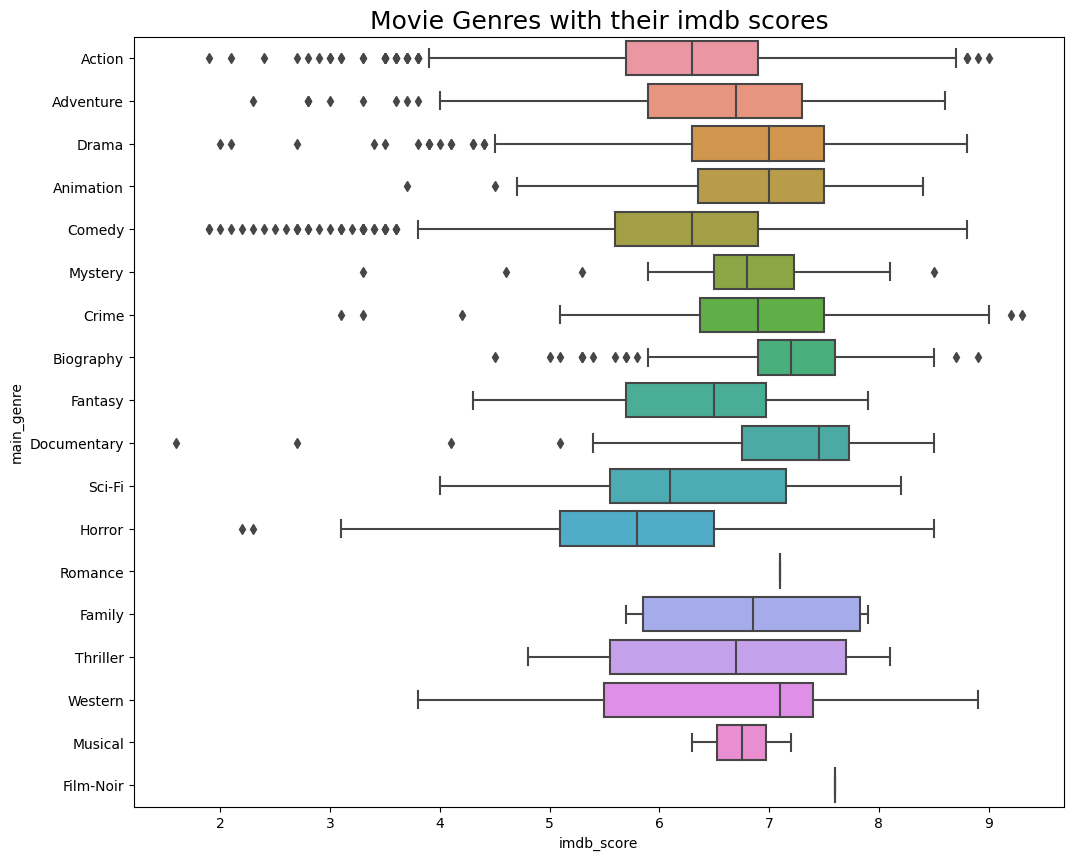

In [12]:
plt.figure(figsize=(12,10))
sns.boxplot(x='imdb_score',y='main_genre',data=df)
plt.title('Movie Genres with their imdb scores',fontsize=18)
plt.show()

In [58]:
for i in df.columns:
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    new_data = data[filtered_entries]

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes
main_genre
num_genres
movie_status


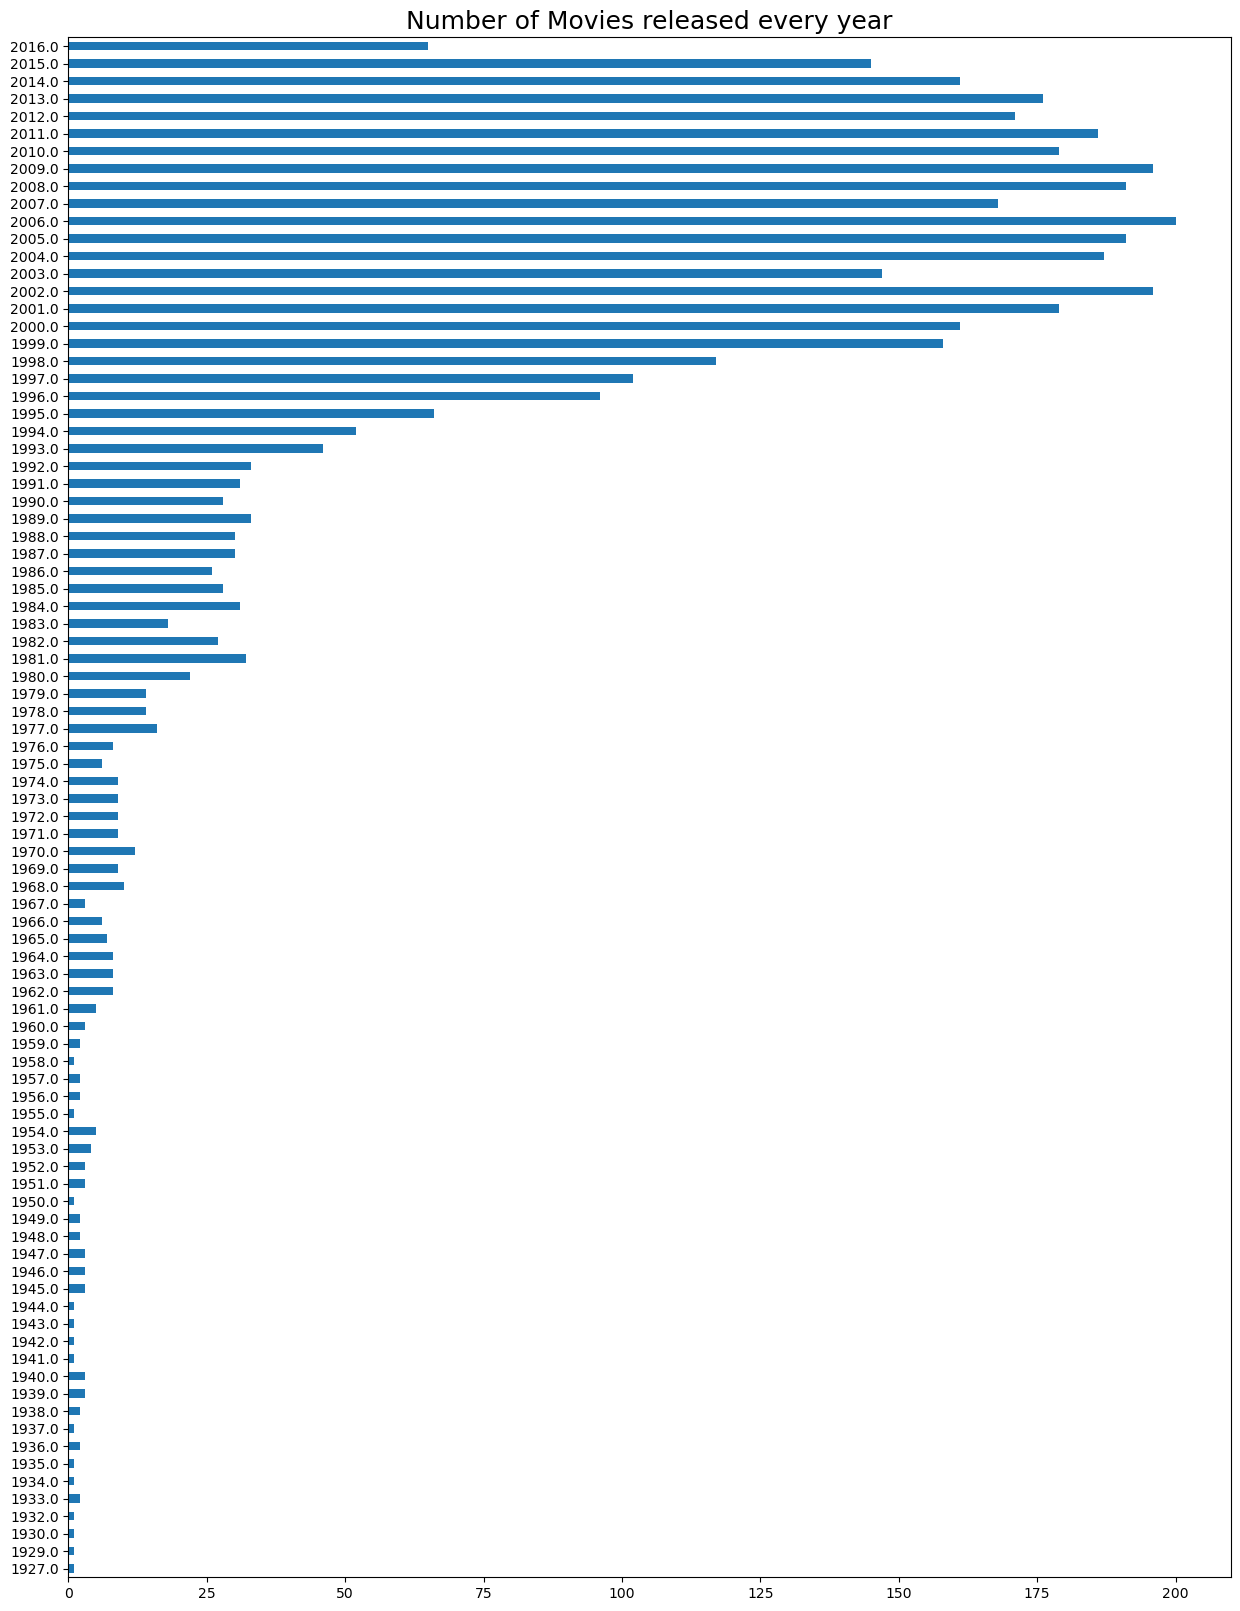

In [13]:
df.title_year.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(15,20))
plt.title("Number of Movies released every year",fontsize=18)
plt.show()

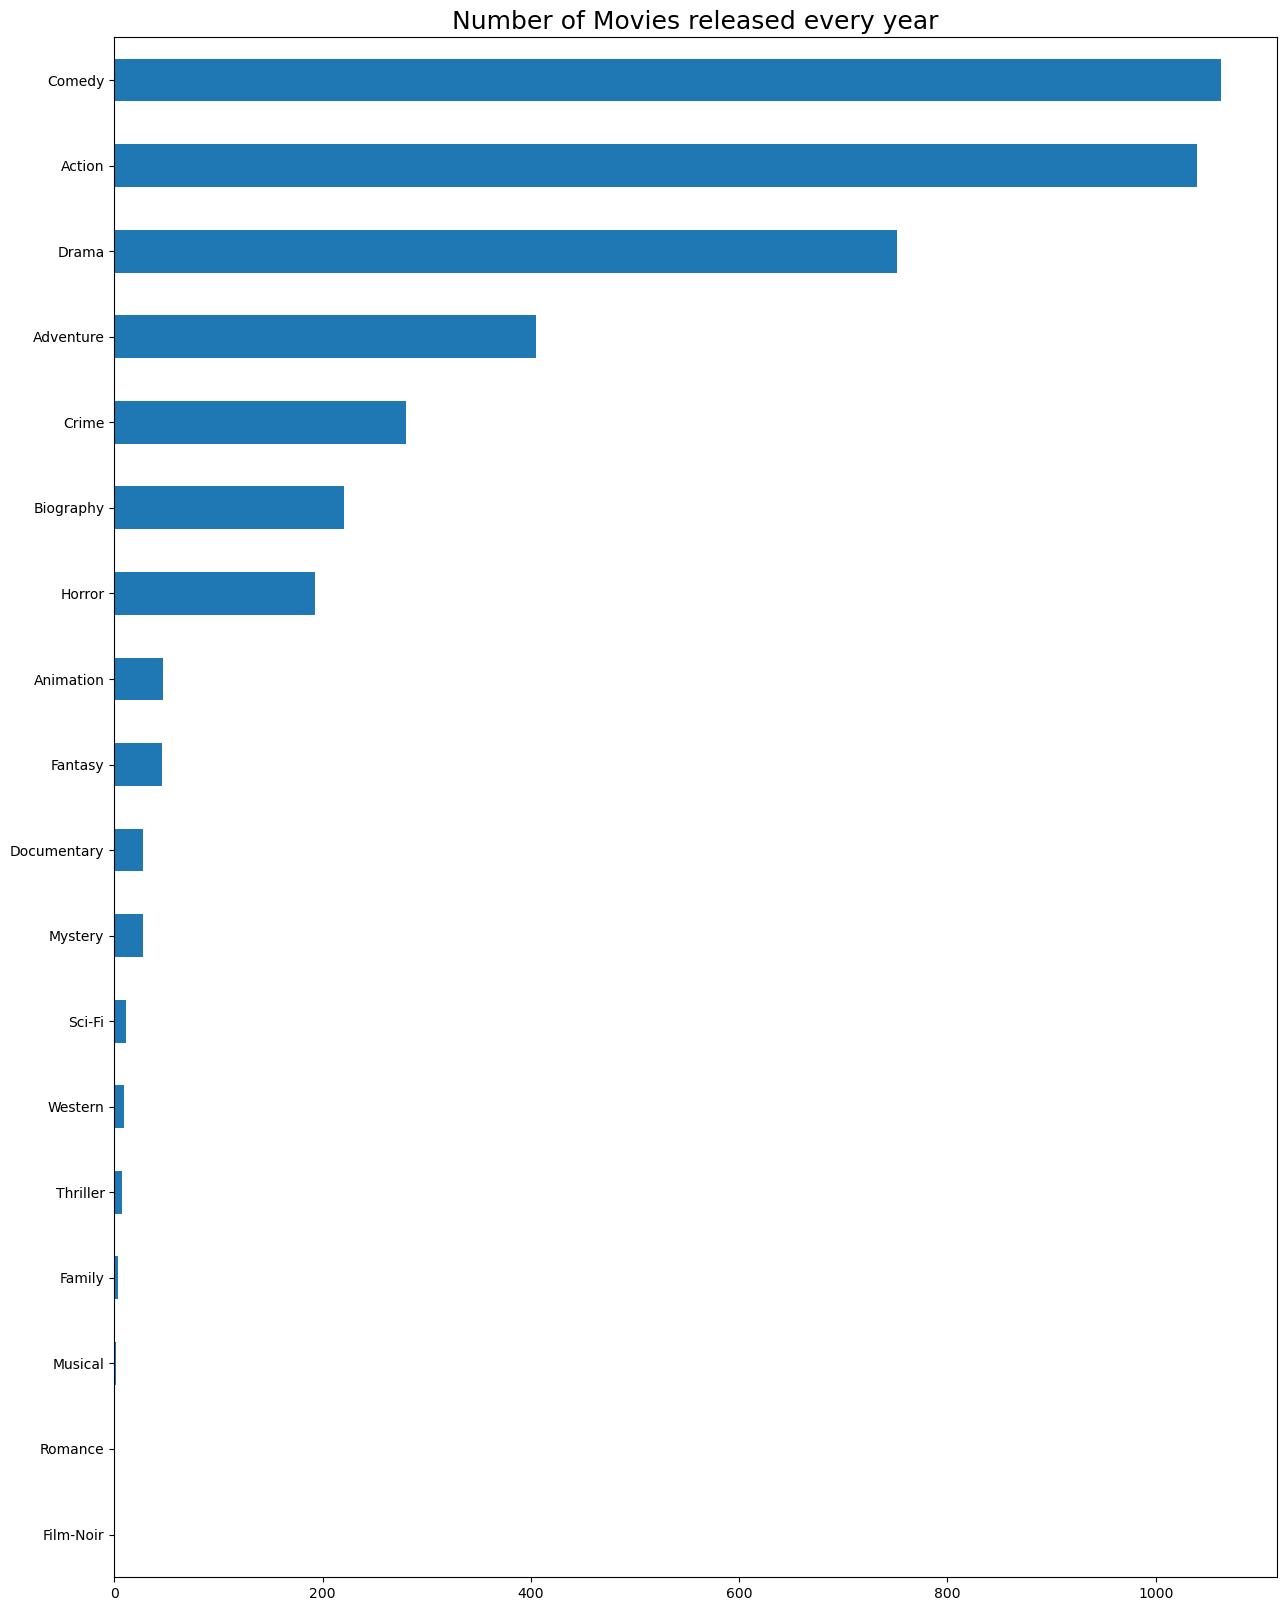

In [14]:
df.main_genre.value_counts(dropna=True).sort_values().plot(kind='barh',figsize=(15,20))
plt.title("Number of Movies released every year",fontsize=18)
plt.show()

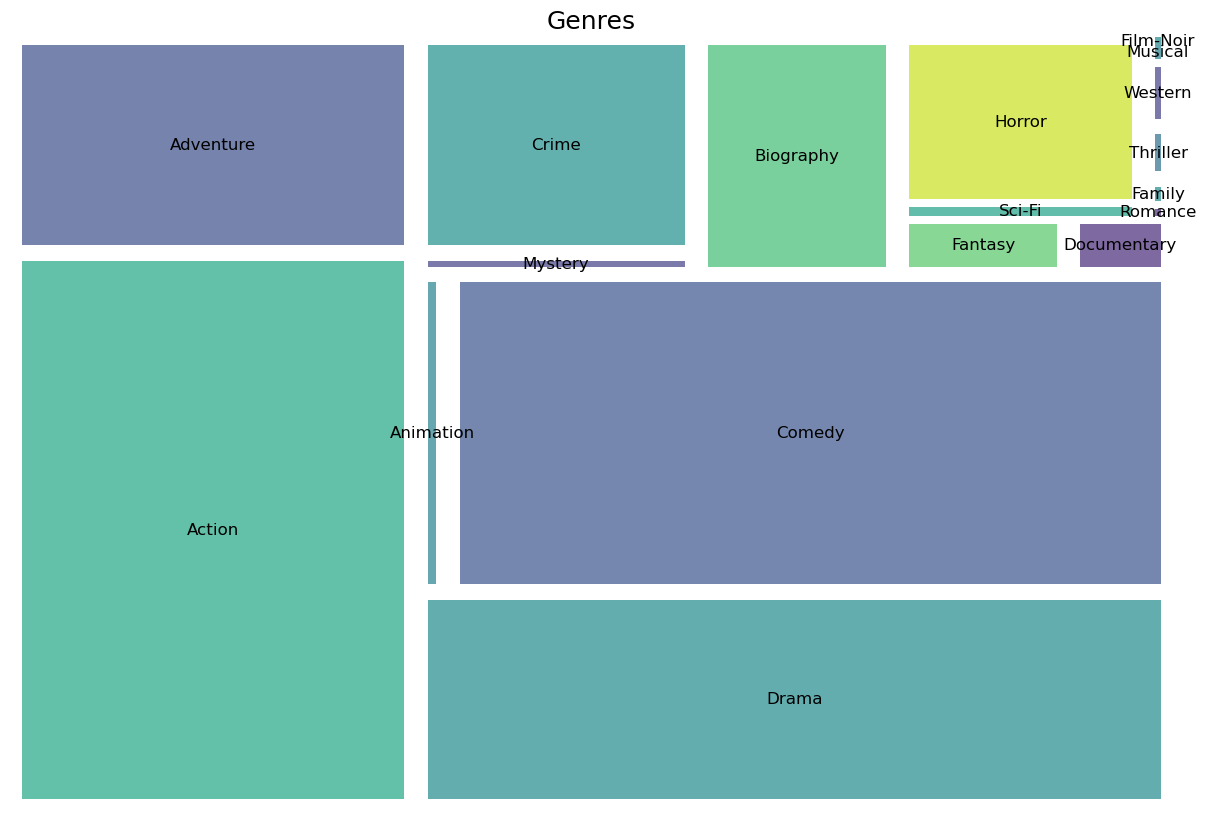

In [15]:
plt.figure(figsize=(15, 10))
squarify.plot(Counter(df['main_genre']).values(),label=Counter(df['main_genre']).keys(),text_kwargs={'fontsize':12}
             ,bar_kwargs={'alpha':.7},pad=True)
plt.title("Genres",fontsize=18)
plt.axis("off")
plt.show()

In [16]:
# Movie with the lowest Imdb rating is Documentary `Justin Bieber: Never Say Never`
df[df['imdb_score']==1.6]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
2834,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,Documentary|Music,Usher Raymond,...,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000,Documentary


In [17]:
# Movie with the highest Imdb rating is Comedy `Towering Inferno`
df[df['imdb_score']==9.3]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,Crime|Drama,Morgan Freeman,...,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000,Crime


## Histogram of all columns in df

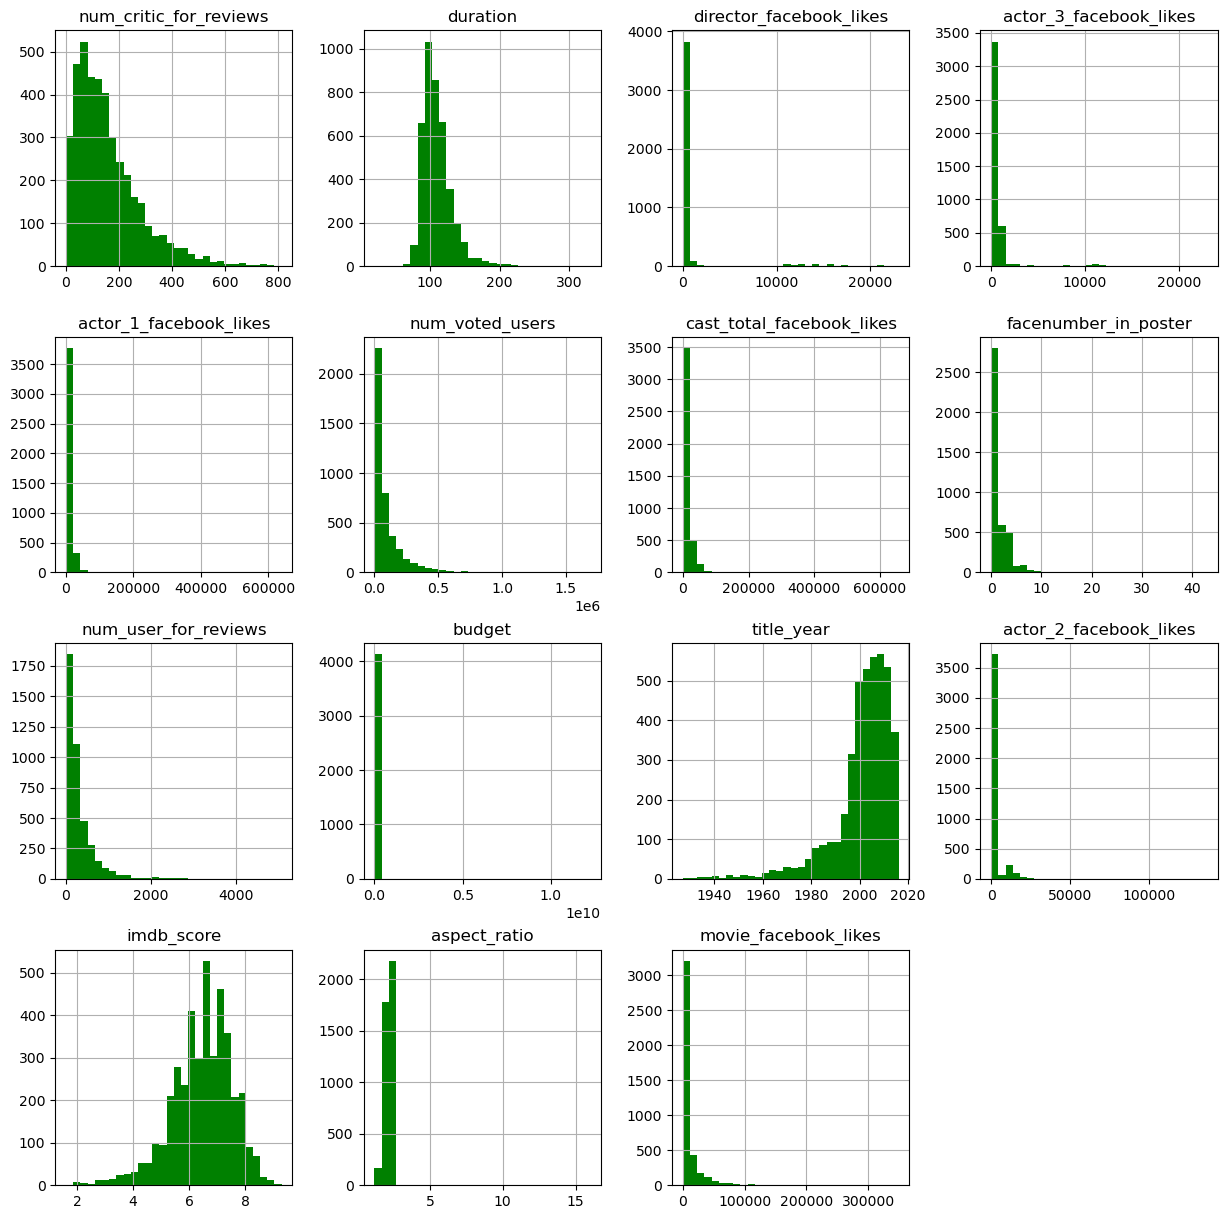

In [18]:
df.hist(bins=30,figsize=(15,15),color='g')
plt.show()

## Adding New Column that shows number of genres in movie

In [19]:
df['num_genres'] = df.genres.apply(lambda x: len(x.split('|')))

In [20]:
df.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
4508,Black and White,Michael Curtiz,24.0,100.0,345.0,94.0,David Niven,843.0,Action|Adventure|Romance|War,Errol Flynn,...,USA,Approved,1200000.0,1936.0,490.0,7.1,1.37,204,Action,4
1085,Color,Antoine Fuqua,109.0,122.0,845.0,854.0,Snoop Dogg,18000.0,Crime|Drama|Thriller,Denzel Washington,...,USA,R,45000000.0,2001.0,881.0,7.7,2.35,0,Crime,3


In [21]:
df.num_genres.max()

8

In [22]:
df[df.num_genres==8]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
902,Color,Don Bluth,78.0,94.0,383.0,753.0,Kelsey Grammer,4000.0,Adventure|Animation|Drama|Family|Fantasy|Music...,Kirsten Dunst,...,USA,G,50000000.0,1997.0,808.0,7.1,2.35,0,Adventure,8
1387,Color,John Frankenheimer,126.0,124.0,287.0,475.0,James Frain,9000.0,Action|Adventure|Crime|Drama|Family|Fantasy|Ro...,Charlize Theron,...,USA,R,34000000.0,2000.0,1000.0,5.7,2.35,852,Action,8
2340,Color,Kevin Munroe,138.0,107.0,14.0,311.0,Laura Spencer,403.0,Action|Comedy|Crime|Fantasy|Horror|Mystery|Sci...,Marco St. John,...,USA,PG-13,20000000.0,2010.0,368.0,5.1,2.35,0,Action,8


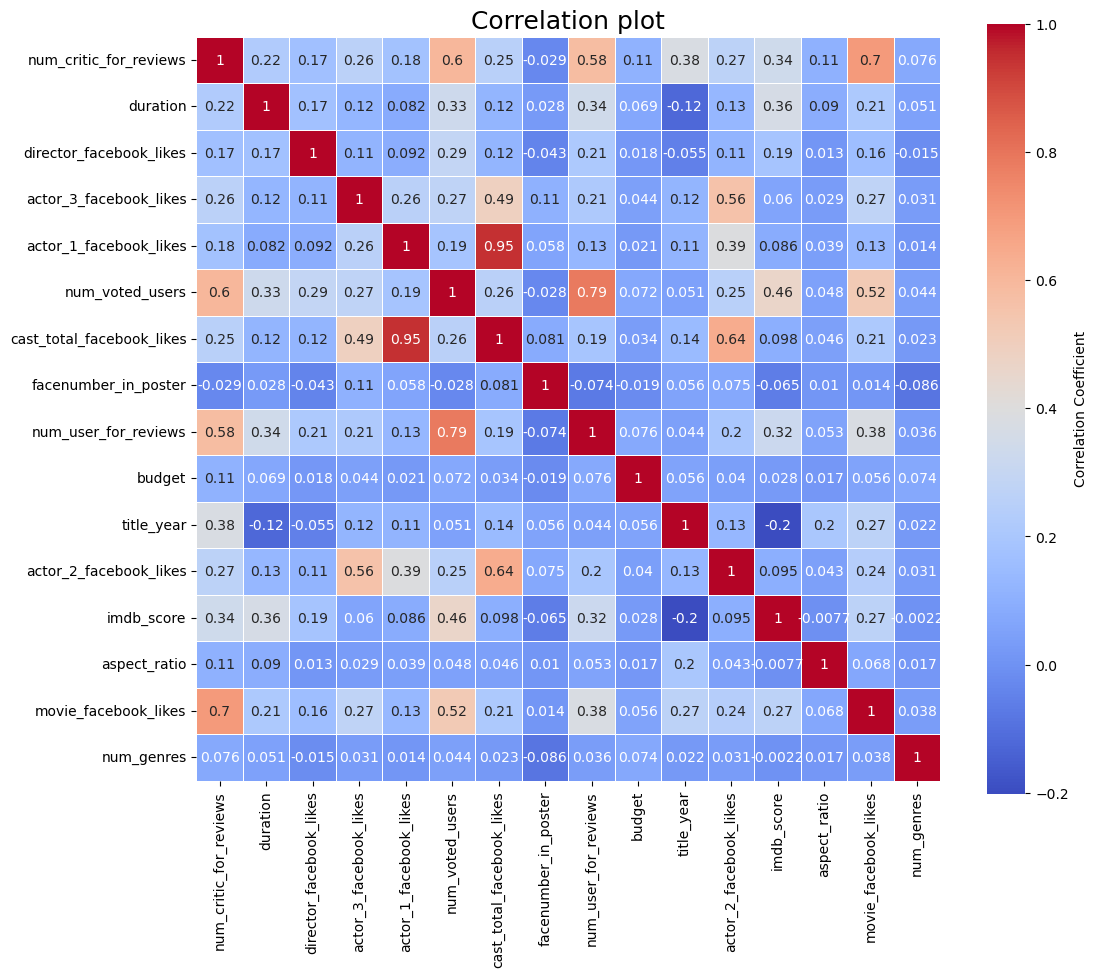

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,
            cmap='coolwarm',square=True,cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation plot",fontsize=18)
plt.show()

### Selected Cols for model
num_critic_for_reviews<br>
duration<br>
num_voted_users<br>
num_user_for_reviews<br>
movie_facbook_likes<br>
director_facebook_likes<br>

In [24]:
X = df[['num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews','movie_facebook_likes'
       ,'director_facebook_likes']]
y = df['imdb_score']

In [25]:
X.shape,y.shape

((4138, 6), (4138,))

In [26]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=32)

In [27]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [28]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_lm= lm.predict(X_test)
print("Mean squared error using linear regression",mean_squared_error(y_test,pred_lm))
print("Mean absolute error using linear regression",mean_absolute_error(y_test,pred_lm))

Mean squared error using linear regression 0.8460732223658524
Mean absolute error using linear regression 0.692871508740898


In [29]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)
print("Mean squared error using Decision Tree Regression",mean_squared_error(y_test,pred_dt))
print("Mean absolute error using Decision Tree regression",mean_absolute_error(y_test,pred_dt))

Mean squared error using Decision Tree Regression 1.457838164251208
Mean absolute error using Decision Tree regression 0.8641304347826086


In [30]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
print("Mean squared error using Support Vector regression",mean_squared_error(y_test,pred_svr))
print("Mean absolute error using Support Vector regression",mean_absolute_error(y_test,pred_svr))

Mean squared error using Support Vector regression 0.8675993999435752
Mean absolute error using Support Vector regression 0.6923713213951066


In [31]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("Mean squared error using KNN regression",mean_squared_error(y_test,pred_knn))
print("Mean absolute error using KNN regression",mean_absolute_error(y_test,pred_knn))

Mean squared error using KNN regression 0.8830812198067632
Mean absolute error using KNN regression 0.7157407407407407


### Conclusion:
#### Linear Regression model seems to perform best among all with MSE = 0.77 and MAE = 0.67

## To work with Classification models, Adding another column "movie_status" that contains wether movie is hit or flop

In [32]:
df['movie_status'] = df['imdb_score'].apply(lambda x: 1 if x>=7 else 0) #1 means HIT, 0 means FLOP

In [33]:
df['movie_status']

0       1
1       1
2       0
3       1
5       0
       ..
5026    0
5027    1
5033    1
5035    0
5042    0
Name: movie_status, Length: 4138, dtype: int64

In [34]:
y = df['movie_status']
X = df[['num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews','movie_facebook_likes'
       ,'director_facebook_likes']]

In [35]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=32)

In [49]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
print("Classification Report for Suppprt Vector Classifier:\n", classification_report(y_test, pred_svc))
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy score for Support Vector Classifier: ", accuracy)

Classification Report for Suppprt Vector Classifier:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       534
           1       0.78      0.36      0.50       294

    accuracy                           0.74       828
   macro avg       0.76      0.65      0.66       828
weighted avg       0.75      0.74      0.71       828

Accuracy score for Support Vector Classifier:  0.7379227053140096


In [48]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred_knn_cls = knn.predict(X_test)
print("Classification Report for KNN Classifier:\n", classification_report(y_test, pred_knn_cls))
accuracy = accuracy_score(y_test, pred_knn_cls)
print("Accuracy score for KNN Classifier: ", accuracy)

Classification Report for KNN Classifier:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       534
           1       0.72      0.40      0.52       294

    accuracy                           0.73       828
   macro avg       0.73      0.66      0.67       828
weighted avg       0.73      0.73      0.71       828

Accuracy score for KNN Classifier:  0.7330917874396136


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)
pred_dt_cls = dt_cls.predict(X_test)
print("Classification Report for Decision Tree Classifier:\n", classification_report(y_test, pred_dt_cls))
accuracy = accuracy_score(y_test, pred_dt_cls)
print("Accuracy score for Decision Tree Classifier: ", accuracy)

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       534
           1       0.55      0.57      0.56       294

    accuracy                           0.68       828
   macro avg       0.65      0.65      0.65       828
weighted avg       0.68      0.68      0.68       828

Accuracy score for Decision Tree Classifier:  0.678743961352657


In [55]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
pred_rf_cls = rf_classifier.predict(X_test)
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, pred_rf_cls))
accuracy = accuracy_score(y_test, pred_rf_cls)
print("Accuracy score for Random Forest Classifier: ", accuracy)

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       534
           1       0.76      0.57      0.65       294

    accuracy                           0.78       828
   macro avg       0.78      0.73      0.75       828
weighted avg       0.78      0.78      0.77       828

Accuracy score for Random Forest Classifier:  0.782608695652174


In [57]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
pred_lr_cls = lr_classifier.predict(X_test)
print("Classification Report for Logistic Regression Classifier:\n", classification_report(y_test, pred_lr_cls))
accuracy = accuracy_score(y_test, pred_lr_cls)
print("Accuracy score for Logistic Regression Classifier: ", accuracy)

Classification Report for Logistic Regression Classifier:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       534
           1       0.76      0.38      0.51       294

    accuracy                           0.74       828
   macro avg       0.75      0.66      0.67       828
weighted avg       0.74      0.74      0.71       828

Accuracy score for Logistic Regression Classifier:  0.7379227053140096
